# SOK-1006 V24

## Forelesning 10 (med løsning) - Produksjonsteknologi og skalaegenskaper

### 1. Skalautbytte

Vi er interessert i et mål for produksjonen når vi oppskalerer bruken av alle faktorer. Dette kalles skalautbytte. Dersom bedriften øker innsatsen av alle faktorer med 20% og den får en 20% økning i produksjon har bedriften en teknologi som viser *konstant* skalautbytte. Dersom produksjon øker med mer enn 20% viser teknologien *økende* skalautbytte; øker produksjon med mindre en den proporsjonale faktorøkningen har vi med en teknologi å gjøre med *avtakende* skalautbytte.       

La oss tenke oss følgende produktfunksjon som forvandler arbeidskraft og kapital til et ferdig produkt:
$$
x=f(N,K).
$$

En økning i bruken av begge faktorer kan kapres matematisk ved å gange innsatsen med et tall $t>1$. Da blir produksjonsmengden gitt ved $f(tN,tK)$. Vi har

- Konstant skalautbytte dersom $f(tN,tK)=tf(N,K)$
- Økende skalautbytte dersom $f(tN,tK)>tf(N,K)$
- Avtakende skalautbytte dersom $f(tN,tK)<tf(N,K).$

### 2. Et eksempel på kort sikt
I forelesning 9 møtte vi en bedrift med produktfunksjon

\begin{equation}
   x=f(N,K)=K\frac{e^N}{A+e^N}\tag{1}
\end{equation}

hvor $N$ er enheter arbeidskraft (målt i timer), $K$ er enheter kapital og $A>0$ er et konstant tall.   
$e$ er Eulers tall (ca. 2,7 1828 1828). På kort sikt er $K=1000$, og $A=200$.       

Hva viser skalaegenskapene til denne produktfunskjonen på kort sikt? Dvs kapitalmengden er fast ved $K=1000$:

\begin{equation}
   x=1000\frac{e^N}{200+e^N}\tag{2}
\end{equation}

Her bruker vi $N$ enheter arbeidskraft og produserer $x$ enheter produkt. Hva om vi dobler $N$? Får vi ut mer enn $2x$ viser teknologien økende skalutbytte; mindre enn $2x$ avtakende, og nøyaktig $2x$ konstant.

**Fremgangsmåte**     
1. Vi lager en funksjon $1000\frac{e^N}{200+e^N}$ som viser opprinnelig produksjonsmengde.
2. Vi "lager" en ny funksjon som viser produsert mengde når vi dobler $N$ til $2N$: $1000\frac{e^{2N}}{200+e^{2N}}$
3. Vi beregner $1000\frac{e^{2N}}{200+e^{2N}}-2(1000\frac{e^N}{200+e^N})$ og undersøker fortegnet. Positivt betyr økende skalautbyte, negativt betyr avtakende, nøyaktig 0 betyr konstant skalutbytte.

(NB. vi kan gange innsatsen med ethvert tall over 1).

In [1]:
# importer pakkene som vi trenger
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [2]:
# definer symboler
N = sp.symbols('N', positive=True, real=True)

In [3]:
# Vi definerer produktfn i utgangspunktet

def prod(c,N):
    produksjon=1000*(c.exp(N)/(200+c.exp(N)))
    return produksjon
prod(sp,N)

1000*exp(N)/(exp(N) + 200)

In [4]:
# Vi kaller produktfn med dobbel innsats

prod(sp, 2*N)

1000*exp(2*N)/(exp(2*N) + 200)

In [5]:
# Vi definerer differansen mellom disse

overskudd=prod(sp,2*N)-2*prod(sp,N)
sp.simplify(overskudd)

1000*((exp(N) + 200)*exp(N) - 2*exp(2*N) - 400)*exp(N)/((exp(N) + 200)*(exp(2*N) + 200))

Dette var ikke lett å tyde fortegnet på. Heldigvis kan vi få hjelp.......

In [6]:
# Finn verdiene for N hvor overskudd er positivt

N_range=sp.solve_univariate_inequality(overskudd>0,N, relational=False)
N_range

# relational = True viser ulikheten. Her får vi frem intervallet.

Interval.open(log(100 - 40*sqrt(6)), log(40*sqrt(6) + 100))

Dette betyr at `overskudd` er positiv for $N$ mellom disse verdiene. La oss gjøre om til desimaltall:

In [7]:
# N_range er et intervall. For å få nederst og øverst grense bruker man .args
N_lav = float(N_range.args[0])
N_lav

0.7033006039928134

In [8]:
N_høy = float(N_range.args[1])
N_høy

5.288163943115169

Dersom $5.29>N>0.7$ får vi mer enn en dobling av produksjon dersom vi dobler $N$, dvs økende skalautbytte. La oss tegne `overskudd`.

In [9]:
def overskudd(c,N):
    return prod(c,2*N)-2*prod(c,N)


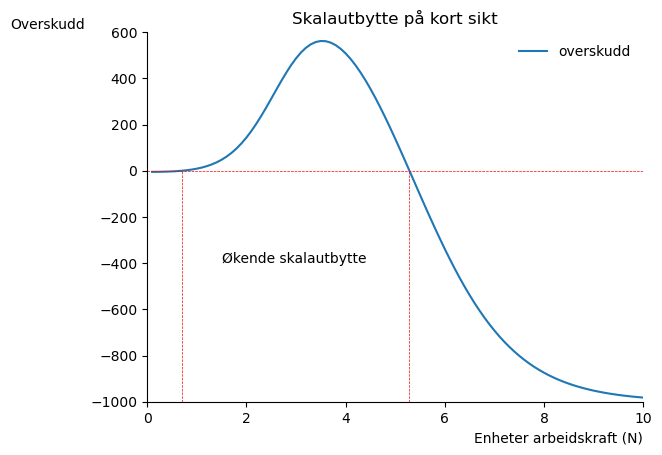

In [10]:
n=np.linspace(0.1,10,100)

fig1, ax = plt.subplots()
ax.set_ylabel('Overskudd', loc='top', rotation = 0)
ax.set_xlabel('Enheter arbeidskraft (N)', loc='right')
ax.set(xlim=(0,10))
ax.set(ylim=(-1000,600))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
                

# plott funksjonen

ax.plot(n, overskudd(np,n), label='overskudd')
ax.hlines(0,0,10, linewidth=0.5, linestyle='dashed', color='red')
ax.vlines(N_lav,-1000, 0, linewidth=0.5, linestyle='dashed', color='red')
ax.vlines(N_høy,-1000, 0, linewidth=0.5, linestyle='dashed', color='red')

ax.text(1.5, -400, "Økende skalautbytte")

# tittel
ax.set_title('Skalautbytte på kort sikt')

#vis navnene:
ax.legend(loc='best',frameon=False);

**Oppgave**

*(i) Beregn grenseproduktiviteten til produktfunksjonen i (2), og tegn i en figur.*        
*(ii) Finn grenseproduktivitetens toppunkt.*     
*(iii) Bruk dine funn for å forklare sammenhengen mellom grenseproduktivitet og skalautbytte.*

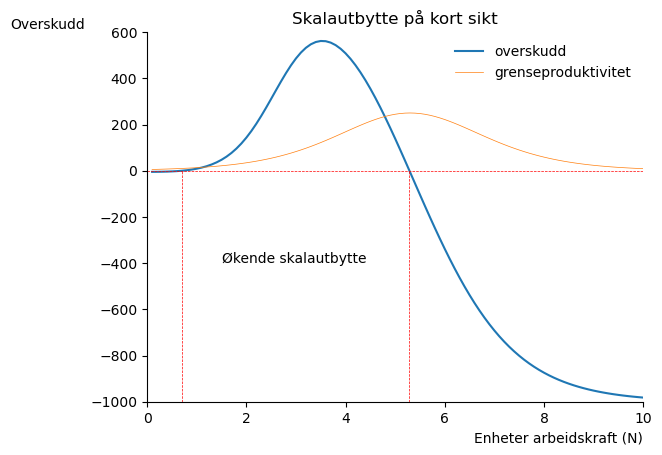

In [11]:
# skriv ditt svar her

# løsningsforslag

# grenseprod
MP = sp.diff(prod(sp,N),N)

# som kan plottes ved lambdify
MP_fn = sp.lambdify((N), MP)

# plott på figuren
ax.plot(n, MP_fn(n), label = "grenseproduktivitet", linewidth=0.5)

ax.legend(loc='best',frameon=False)
fig1


In [12]:
# finn topp på grenseprod-kurven
diff_MP=sp.diff(MP,N)

maks_MP = float(sp.solve(diff_MP,N)[0])
maks_MP

5.298317366548036

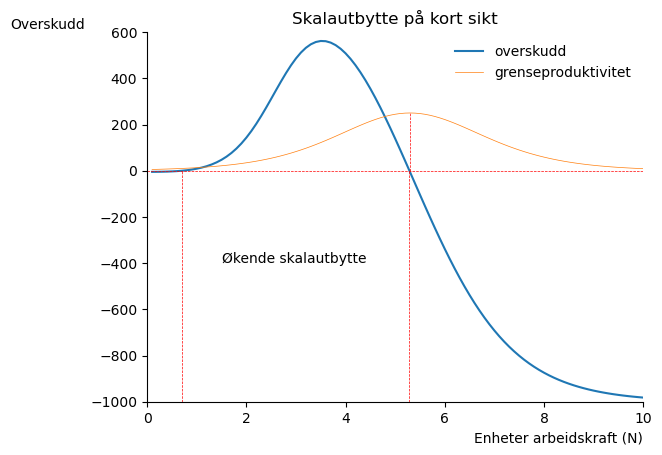

In [13]:
ax.vlines(maks_MP, 0, MP_fn(maks_MP), linewidth=0.5, linestyle='dashed', color='red')
ax.legend(loc='best',frameon=False)
fig1


Hva betyr dette for forholdet mellom grenseproduktivitet og skalautbytte? Her må vi være forsiktig ettersom vi har med kun én innsatsfaktor å gjøre. Det betyr at svaret vi har funnet ikke nødvendigvis kan generaliseres til produksjon med flere faktorer. Men med én faktor ser det ut til at økende grenseproduktiviteten til arbeidskraft gir økende skalutbytte. Når grenseproduktiviteten begynner å avta får vi avtakende skalautbytte.

### 3. Skalautbytte i Cobb-Douglas produktfunksjoner

En bedrift bruker følgende Cobb-Douglas produktfunksjon til å lage et gode


\begin{equation}
   x = f(N,K)=N^aK^{b}\;\;(3)
\end{equation}


hvor $x$ er enheter ferdigprodukt, $N$ er enheter arbeidskraft (målt i timer), $K$ er enheter kapital og $a>0, b>0$ er konstante tall. (Sjekk at du vet hva $a$ og $b$ er!).   

La oss undersøke skalaegenskapene til denne produktfunksjon ved å bruke fremgangsmåten i forrige avsnitt.


In [14]:
# definer nye symboler
K, a, b = sp.symbols('K a b', positive=True, real=True)

In [15]:
# definer produktfn
def prod_cd(N,K,a,b):
    return N**a*K**b



# finn "overskudd" fra en fordobling av innsats i forhold til dobbel så mye produksjon
# NB begge innsatsfaktorene fordobles

overskudd_cd=prod_cd(2*N,2*K,a,b)-2*prod_cd(N,K,a,b)
sp.simplify(overskudd_cd)

K**b*N**a*(2**(a + b) - 2)

Dersom dette uttrykket er positivt har vi med økende skalautbytte å gjøre. Vi ser at det er delen i parentes som vi må analysere, og her blir $a+b$ viktig for fortegnet her. Dersom $a+b=1$ er `overskudd_cd` = 0; dersom $a+b>1$ er `overskudd_cd` > 0; dersom $a+b<1$ er `overskudd_cd` < 0. Da har vi utledet et generelt resultat for Cobb-Douglas produktfunksjoner som i (3):        

- $a+b<1$ betyr avtakende skalautbytte
- $a+b=1$ betyr konstant skalautbytte
- $a+b>1$ betyr økende skalautbytte.


Skalautbytte er illustrert i boka Figur 4.8, 4.9, og 4.10.

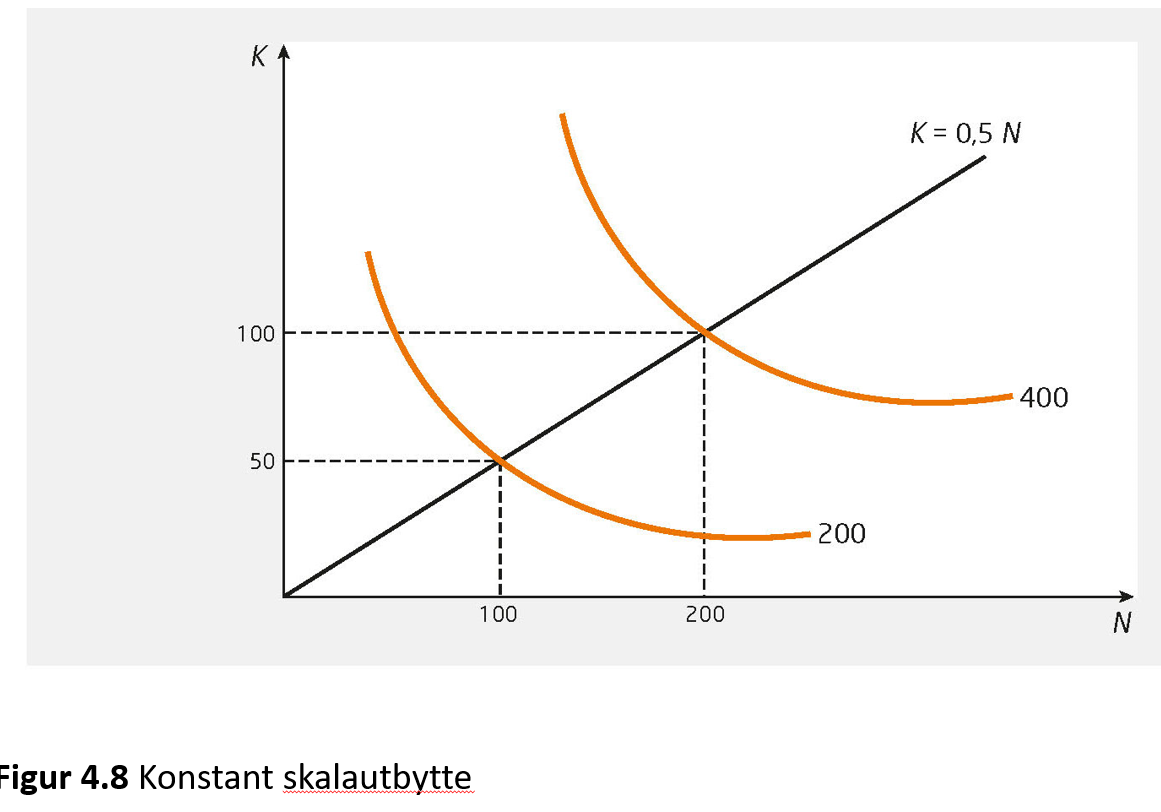

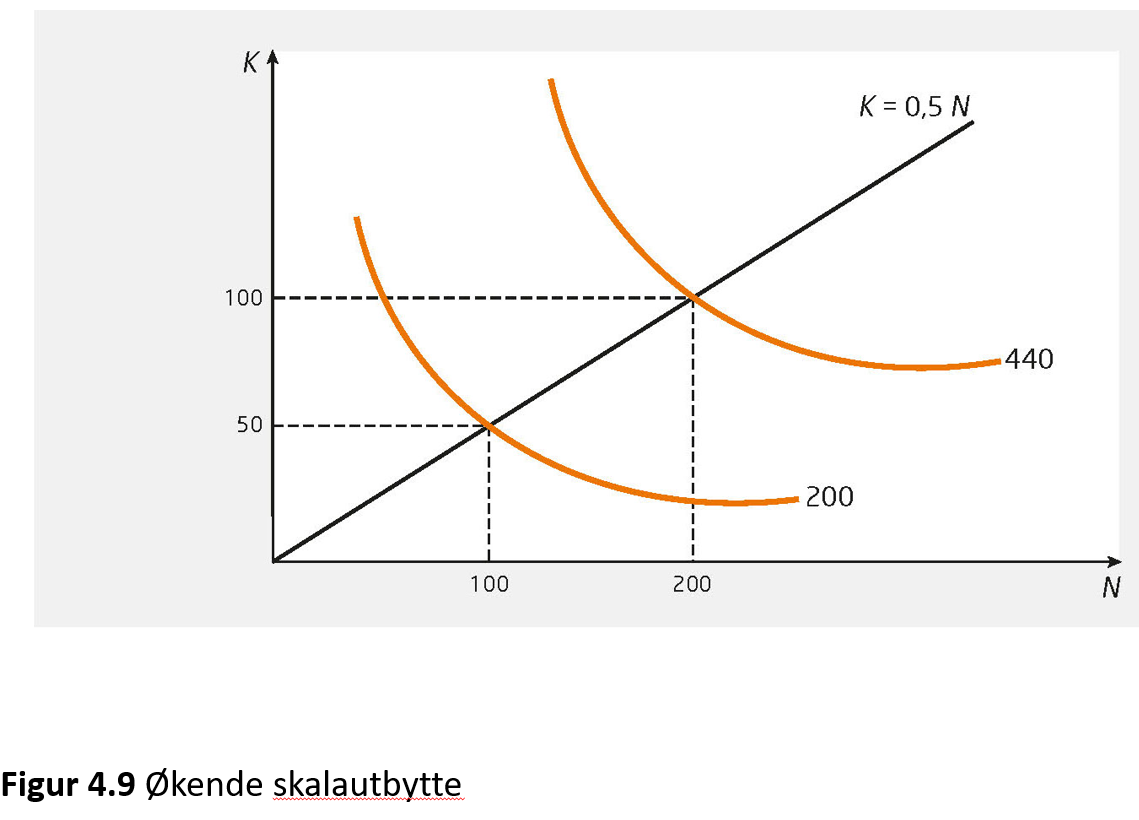

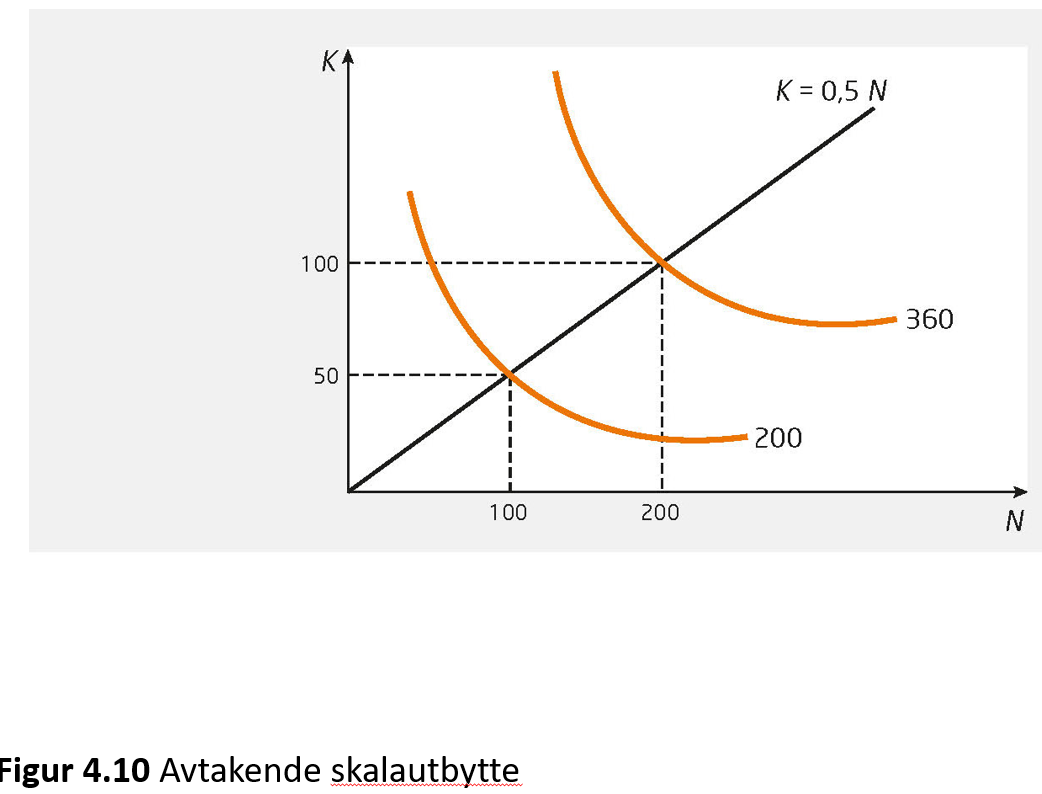

### 4. Skalautbytte i empirisk arbeid

Produktfunskjoner av typen i (3) er ikke-lineære sammenhenger (variablene ganges sammen etter å ha blitt opphøyet med en eksponent!). Ved å ta logaritmer av begge sidene av uttrykket kan vi gjøre dette om til en lineær sammenheng (hvor variablene plusses sammen). Dette er mye enklere å jobbe med.       

Tenk at vi har følgende produktfunksjon:

\begin{equation}
   x = f(N,K)=Z N^aK^{b}\tag{4}
\end{equation}

hvor $Z>0$ kalles total faktorproduktivitet.        

**Oppgave**       
*a) Skriv om (4) ved å ta logaritmer av begge sidene, og vis at teknologien kan skrives som*   

\begin{equation}
   ln x= ln Z + a ln N + b ln K
\end{equation}

*b) Økonom X har data for faktorbruk og produksjon av produktet, og har estimert følgende sammenheng:*


\begin{equation}
  ln x= 3.2 + 0.75 ln N + 1.1 ln K
\end{equation}

*c) Hvor mye økes produksjon dersom bedriftseieren øker i) N med 10%, ii) K med 10%?*      

*d) Viser estimatene at produksjonsprosessen karakteriseres av økende, avtakende eller konstant skalautbytte?*   


In [16]:
# skriv ditt svar her

# løsningsforslag

# definer symbol Z

Z = sp.symbols('Z', real=True, positive=True)

# definer prod i (4)

def prod_4(N,K,a,b,Z):
    return Z*N**a*K**b

# ta log av produktfunksjonen log(x)=....
prod_log=sp.log(prod_4(N,K,a,b,Z))
prod_log

log(K**b*N**a*Z)

In [17]:
# som ikke er på ønsket form. La oss utvide uttrykket vha sp.expand()
sp.expand(prod_log)

a*log(N) + b*log(K) + log(Z)

b) produksjonselastisiteten til arbeidskraft er 0.75, og den til kapital er 1.1. En økning i arbeidskraft med 1% gir en økning i produksjon med 0.75%, en økning med 1% i kapitalmengden gir en økning i produksjon med 1.1%.      

c) NB. Elastisiteter gjelder for små endringer - dette er grunnen til at vi legger en 1% økning til grunn. 10% er en ganske stor endring, og på grensen til hva vi kan bruke elastisiteter til. En 10% økning i N (K) gir en ca 7.5% (11%) økning i produksjon.      

d) Summen av elastisitetene er 1.85 > 1 og da har vi med økende skalautbytte å gjøre.


**Oppgave**       

[Ren og Jie (2019)](https://github.com/uit-sok-1006-v25/uit-sok-1006-v25.github.io/blob/main/artikler/Returns%20to%20scale%20China.pdf) estimerer produktfunksjoner for flere sektorer i Kina basert på data fra perioden 1993-2015. På side 361 spesifiserer de følgende produktfunksjon:


$$ Y_{it} = A_i K^{\alpha}_{it} (h_{it}  L_{it})^\beta R^\gamma_{it} e^{\epsilon_{it}}$$



hvor i er sektoren, t er tid, Y er produksjon i sektoren, K er kapitalen (og andre materialer) brukt, h er menneskelig kapital, L er mengde arbeidskraft, R er utgifter på Forskning og Utvikling (FoU), e er Eulers tall og $\epsilon$ er et tilfeldig feiledd.   
a) Hva måler $h  L$ i hver sektor? Hvorfor inkluderes FoU i produktfunksjon? Løser dette noen av problemene du identifiserte i første  oppgave i forelesning 9? Introduseres flere problemer? (Tenk på måleenheter for eksempel).           
b) Gi en tolkning av $\alpha, \beta, \gamma$. Forfatterne definerer videre $\psi=\alpha+\beta+\gamma$, og sier at $\psi=1$ angir konstantskalautbytte, $\psi<1$ avtakende skalautbytte, og $\psi>1$ økende skalautbytte. Forklar hvorfor dette er tilfellet.    
c) Vis hvordan forfatterne utleder deres likning (2) på side 362 ved å ta logaritmer av begge sidene.       
d) Skriv uttrykket som måler gjennomsnittsproduktiviteten til arbeidskraft $\frac{Y_{it}}{(h_{it}  L_{it})}$.         
e) Ta logaritmer av begge sider av ditt svar på deloppgave (d) og vis hvordan forfatterne utleder sin likning (3).   
f) Tallet som er fremfor variablen $ln (h_t  L_{it})$ er $(\psi-1)$. Dette er et tall som forfatterne estimerer ved bruk av statistiske metoder, og som brukes for å tyde type skalautbytte i en sektor (se over ditt svar på deloppgave b). Hva viser skalaegenskapene dersom: (i) $\psi-1=-0,6$, (ii) $\psi-1=0,6$, (iii) $\psi-1=0$?    
g) Tabell II på side 366-7 gir resultatene av den statistiske modellen Her er to likninger estimert for hver sektor: (1) tar med FoU utgifter mens (2) utelater denne variablen. Se på tallene i kolonne 3 som er de estimerte verdiene av $\psi-1$. Tall som er merket med en til tre stjerner er vi rimelig sikker på er ikke null (desto flere stjerner jo mer sikker er vi på dette - dere vil lære om dette til høsten i kurset om statistikk). Se på linjen i Tabell II for sektoren "Production and supply of electricity, gas and water". Tallet som måler $\psi-1$ er 0.198 i modellen med FoU og 0.343 i modellen uten. Ingen av disse tallene er merket med en stjerne så de er statistisk lik null. Derav kommer konklusjonen om at denne sektoren viser konstant skalautbytte. Se på skalaegenskapene til de øvrige sektorene - er disse fornuftige konklusjoner tror du (for eksempel: resultatene viser at dersom man fordobler ressursbruk i produksjonen av "machinery and equipment" får man mer enn dobbel så mye output - hvordan forklarer du dette?).   



In [18]:
# skriv ditt svar her

# se løsningen i kursplanen!